# Project: Pytorch

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [471]:
# @title #### Student Identity
student_id = "REAGRZQD" # @param {type:"string"}
name = "Theofilus Arifin" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1QP8COmC7Gk1f2Hjf6Nk4RzoFhc-K6V4K?usp=sharing"  # @param {type:"string"}

assignment_id = "00_pytorch_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this project, you will use what you learn to create your own Deep Learning model. We'll use a variety of datasets, each with different data types such as images, text, and numerical/categorical data. Your task is to choose one of these datasets and build a deep learning model upon it.


## Datasets

Choose one from the following datasets for your project:

1. **Digits Dataset**: A simplified version of MNIST containing 8x8 images of hand-written digits. [Dataset Link](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)
2. **Dogs vs. Cats Dataset from Kaggle**: A sizable dataset of 25,000 images with equal representation of dogs and cats. [Dataset Link](https://www.kaggle.com/c/dogs-vs-cats)
3. **Breast Cancer Wisconsin (Diagnostic) Dataset**: Computed features from a digitized image of a fine needle aspirate (FNA) of a breast mass. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)
4. **Spam Text Message Classification Dataset**: A collection of labeled SMS messages, categorized as "spam" or "ham". [Dataset Link](https://www.kaggle.com/uciml/sms-spam-collection-dataset)
5. **German Credit Risk Dataset**: People's data categorized by various attributes to predict credit risk. [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29)



## Grading Scheme

Your work will be evaluated based on both accuracy and loss value:

100: The model has an accuracy of more than 80% and a Loss Value of less than 0.2. This model is excellent and demonstrates a strong understanding of the task.

90: The model has an accuracy between 70% - 79% and a Loss Value between 0.2 - 0.3. This model is very good, with some room for improvement.

80: The model has an accuracy between 60% - 69% and a Loss Value between 0.3 - 0.4. This model is fairly good but needs improvement in balancing accuracy and loss value.

70: The model has an accuracy between 50% - 59% and a Loss Value between 0.4 - 0.5. This model is below average and needs significant improvement.

60 or below: The model has an accuracy of less than 50% or a Loss Value of more than 0.5, or the student did not submit the accuracy and Loss Value. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Let's start your deep learning journey! Choose your dataset and delve into the project! Happy modeling!

## Project Structure

Your project should be organized into five main sections.

### 1. Package and Module Installation

First, let's pool all package and module that you'll need in the installation section below.

In [472]:
!pip install ucimlrepo

In [473]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

### 2. Data Loading and Preprocessing

#### Exploratory Data Analysis

In [474]:
# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Concatenate features and targets into a DataFrame
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=["class"])], axis=1)

df.shape

(1000, 21)

In [475]:
df.head(3)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attribute1   1000 non-null   object
 1   Attribute2   1000 non-null   int64 
 2   Attribute3   1000 non-null   object
 3   Attribute4   1000 non-null   object
 4   Attribute5   1000 non-null   int64 
 5   Attribute6   1000 non-null   object
 6   Attribute7   1000 non-null   object
 7   Attribute8   1000 non-null   int64 
 8   Attribute9   1000 non-null   object
 9   Attribute10  1000 non-null   object
 10  Attribute11  1000 non-null   int64 
 11  Attribute12  1000 non-null   object
 12  Attribute13  1000 non-null   int64 
 13  Attribute14  1000 non-null   object
 14  Attribute15  1000 non-null   object
 15  Attribute16  1000 non-null   int64 
 16  Attribute17  1000 non-null   object
 17  Attribute18  1000 non-null   int64 
 18  Attribute19  1000 non-null   object
 19  Attribute20  1000 non-null  

In [477]:
# Separate columns into numeric and string types
numeric_columns = df.select_dtypes(include='number')
string_columns = df.select_dtypes(include='object')

print(len(numeric_columns.columns))
print(len(string_columns.columns))

8
13


Kolom sudah terbagi berdasarkan tipe data numerik dan string, jumlah total kolom numering dan string yang terbagi sudah sama dengan total kolom

In [478]:
numeric_columns.describe()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Tidak terdapat perbedaan yang signifikan antara median dan mean pada tiap kolom numerik, hal ini menandakan outlier yang ada pada suatu kolom tidak banyak dan tidak perlu dilakukan log transformation atau transformation lainnya

In [479]:
string_columns.describe()

,Attribute1,Attribute3,Attribute4,Attribute6,Attribute7,Attribute9,Attribute10,Attribute12,Attribute14,Attribute15,Attribute17,Attribute19,Attribute20
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


In [480]:
string_columns.Attribute19.value_counts()

A191    596
A192    404
Name: Attribute19, dtype: int64

#### Data Preprocessing

In [481]:
# One-Hot Encoding
one_hot_feature = ["Attribute1", "Attribute3", "Attribute4", "Attribute6", "Attribute7", "Attribute9", "Attribute10", "Attribute12", "Attribute14", "Attribute15", "Attribute17"]
df = pd.get_dummies(df, columns=one_hot_feature)

In [482]:
# Label Encoding
label_encoding_feature = ["Attribute19", "Attribute20"]
label_encoder = LabelEncoder()
for feature in label_encoding_feature:
    df[feature] = label_encoder.fit_transform(df[feature])

In [483]:
# Using pop() to remove a column
class_column = df.pop("class")

# Reinserting the popped column as the last column
df["class"] = class_column

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute2        1000 non-null   int64
 1   Attribute5        1000 non-null   int64
 2   Attribute8        1000 non-null   int64
 3   Attribute11       1000 non-null   int64
 4   Attribute13       1000 non-null   int64
 5   Attribute16       1000 non-null   int64
 6   Attribute18       1000 non-null   int64
 7   Attribute19       1000 non-null   int64
 8   Attribute20       1000 non-null   int64
 9   Attribute1_A11    1000 non-null   uint8
 10  Attribute1_A12    1000 non-null   uint8
 11  Attribute1_A13    1000 non-null   uint8
 12  Attribute1_A14    1000 non-null   uint8
 13  Attribute3_A30    1000 non-null   uint8
 14  Attribute3_A31    1000 non-null   uint8
 15  Attribute3_A32    1000 non-null   uint8
 16  Attribute3_A33    1000 non-null   uint8
 17  Attribute3_A34    1000 non-null   

Semua fitur sudah menjadi numerik, sudah dapat dimasukkan ke dalam model. Sebelum itu, seleksi fitur akan dilakukan untuk menentukan fitur mana yang berpengaruh kuat terhadap target class

#### Feature Selection

In [485]:
def display_highly_correlated_pairs(df, high_corr_threshold=0.7, display=True):
    # Compute the correlation matrix
    corr_matrix = df.corr(numeric_only=True)

    # Identify highly correlated features
    high_corr_pairs = (corr_matrix.abs() > high_corr_threshold) & (corr_matrix != 1)

    # Display highly correlated feature pairs
    shown_pairs = set()
    if display:
        print("Highly correlated feature pairs:")
        for index, row in high_corr_pairs.iterrows():
            for col, value in row.items():
                if value and (col != index):
                    pair = tuple(sorted([index, col]))
                    if pair not in shown_pairs:
                        correlation = corr_matrix.loc[index, col]
                        print(f"{index} - {col}: {correlation:.2f}")
                        shown_pairs.add(pair)

    return None

In [486]:
display_highly_correlated_pairs(df)

Highly correlated feature pairs:
Attribute9_A92 - Attribute9_A93: -0.74
Attribute10_A101 - Attribute10_A103: -0.73
Attribute12_A124 - Attribute15_A153: 0.78
Attribute14_A141 - Attribute14_A143: -0.84
Attribute15_A151 - Attribute15_A152: -0.74


Feature yang akan di memiliki high correlation akan didrop salah satu agar tidak redundan. Feature-feature yang akan didrop adalah

- Attribute9_A92
- Attribute10_A101
- Attribute12_A124
- Attribute14_A141
- Attribute15_A151

In [487]:
multicol_feature = ["Attribute9_A92","Attribute10_A101","Attribute12_A124","Attribute14_A141","Attribute15_A151"]
df.drop(columns=multicol_feature, inplace=True)

In [488]:
display_highly_correlated_pairs(df)

Highly correlated feature pairs:


Sudah tidak ada lagi feature yang highly correlated

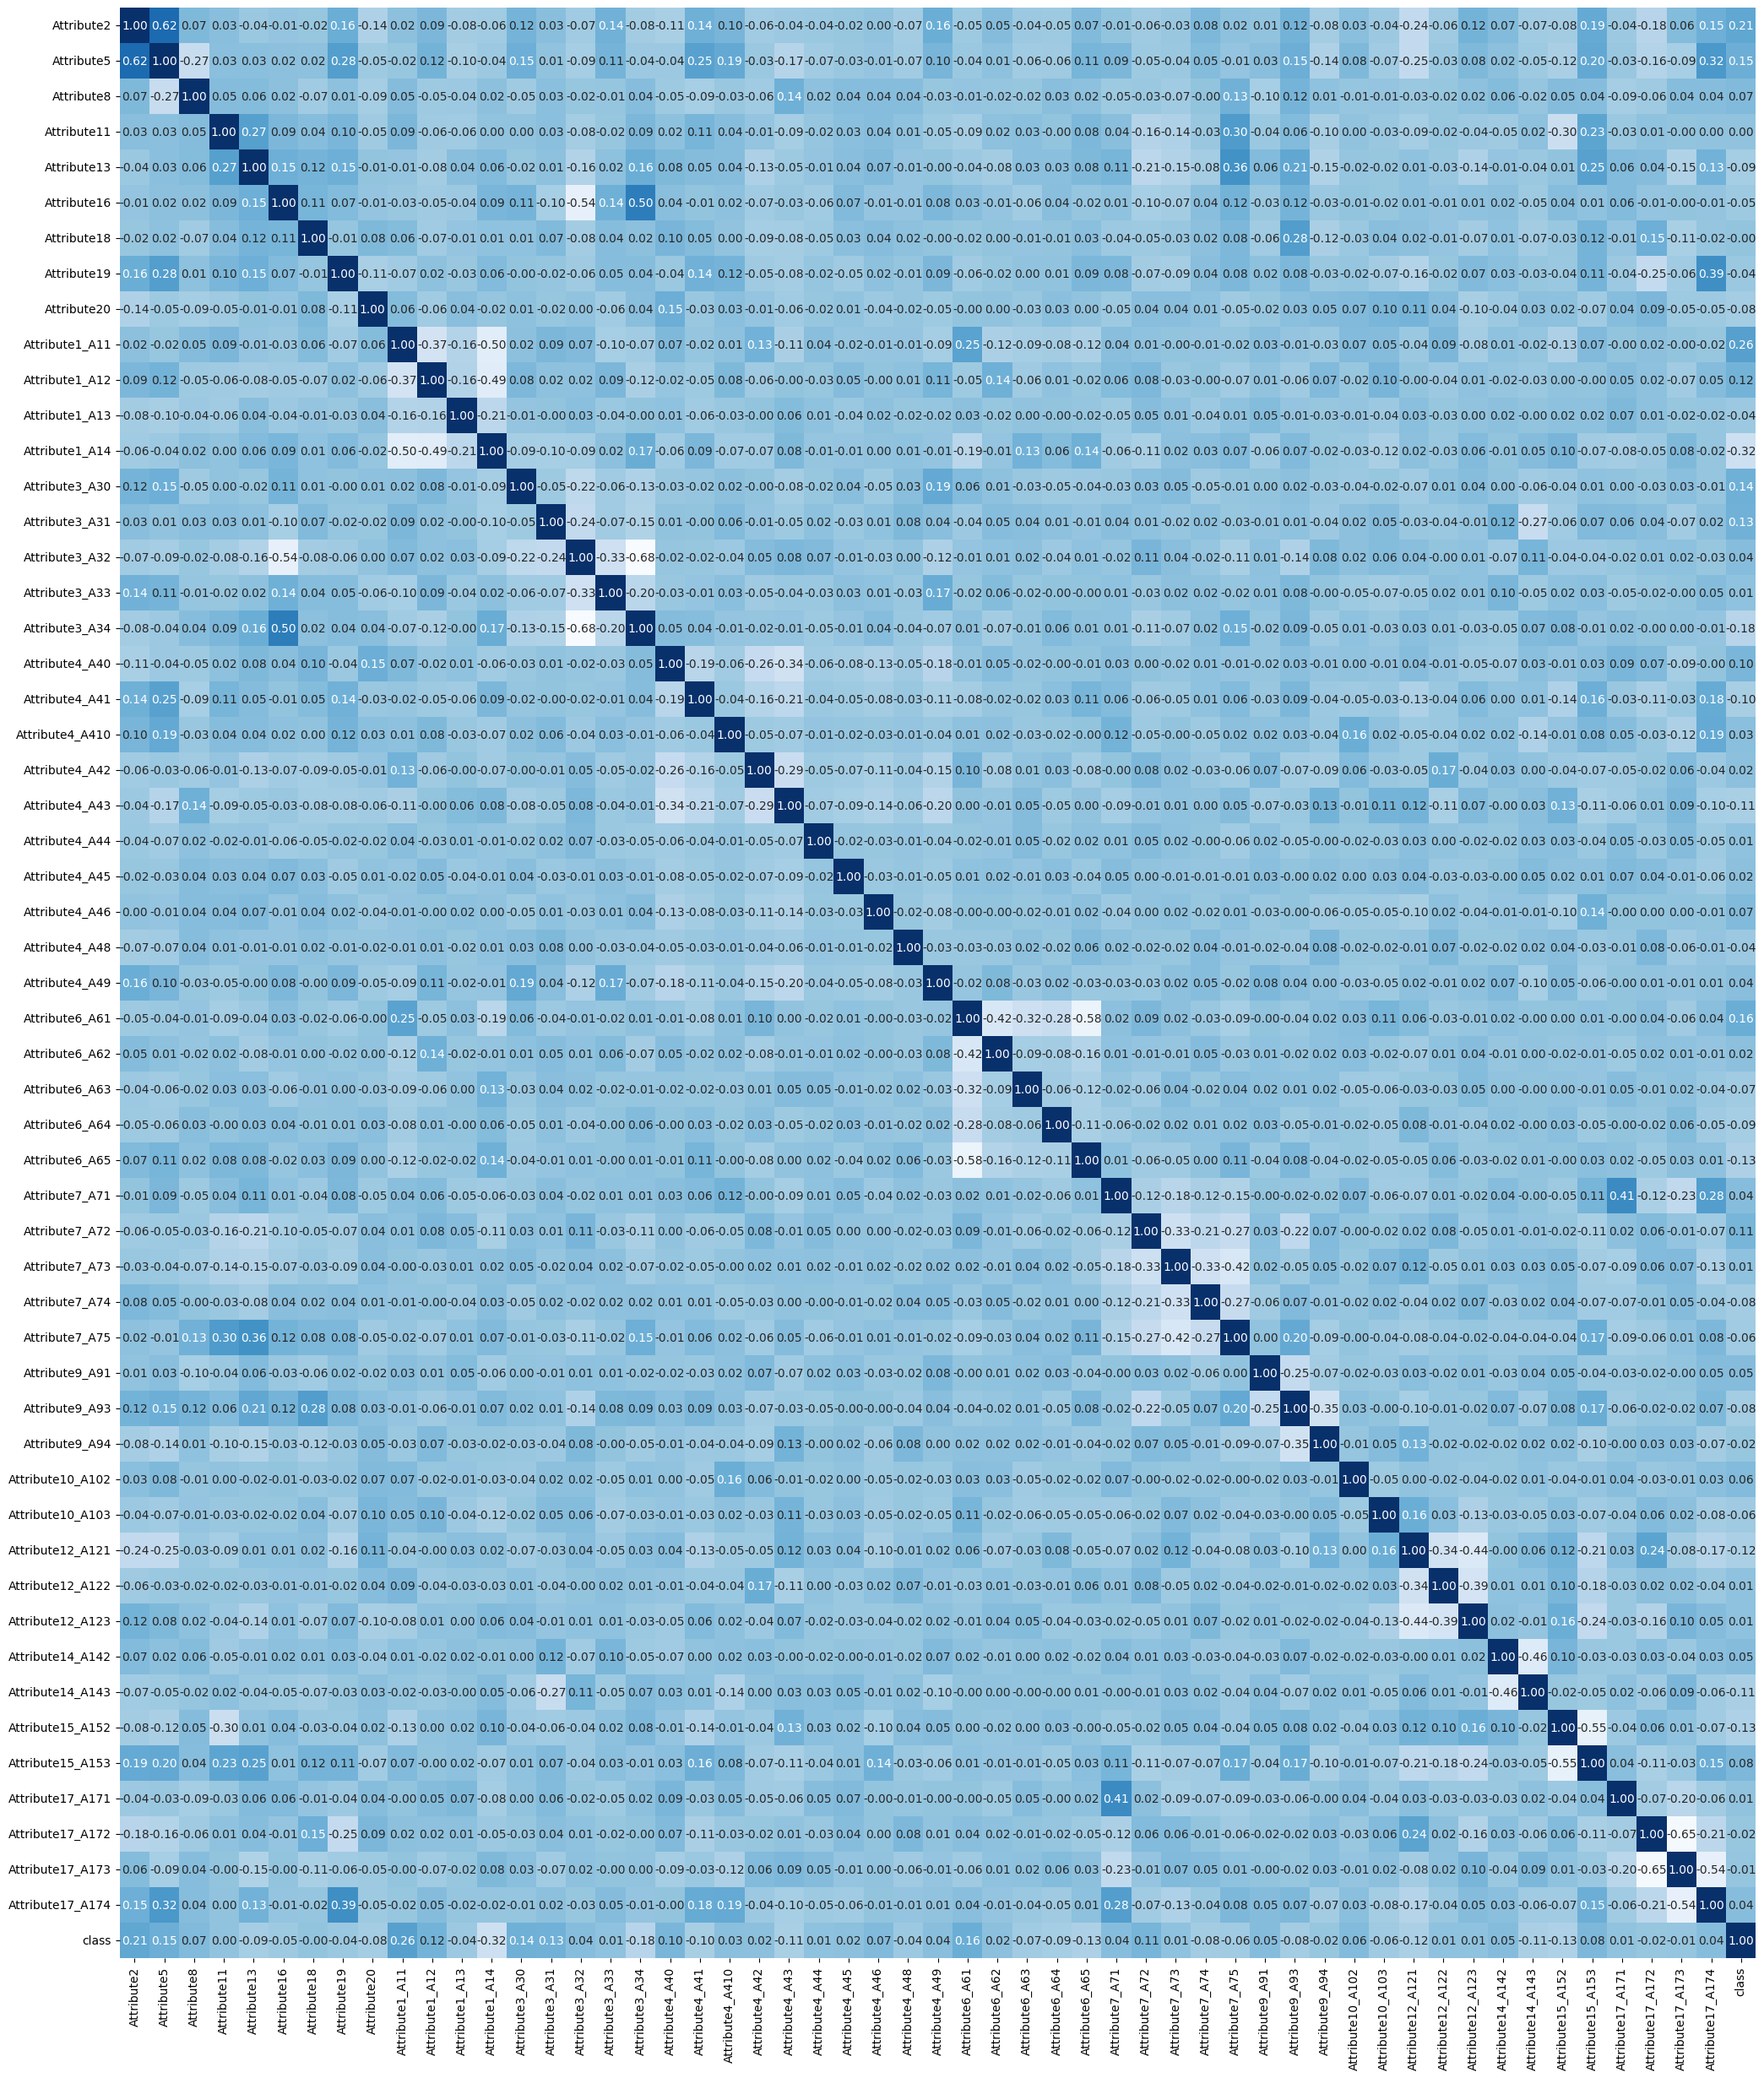

In [489]:
plt.figure(figsize=(25, 30))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.show()

Dapat dilihat, terdapat banyak kolom yang memiliki korelasi yang rendah terhadap target class. Kolom ini merupakan fitur yang tidak terlalu signifikan dan daptat di drop

In [490]:
def print_low_correlation_features(df, threshold):
    target_column = df.columns[-1]
    correlation_with_class = df.corr()[target_column].drop(target_column)
    low_correlation_features = correlation_with_class[correlation_with_class < threshold]

    print(f"Features with correlation < {threshold} with the target class:")
    for feature, correlation in low_correlation_features.items():
        print(f"{feature}: {correlation}")

    return low_correlation_features.index.tolist()

Kolom yang memiliki korelasi di bawah 5% akan di drop karena memiliki korelasi yang terlalu kecil sehingga tidak terlalu memberikan pengaruh yang signifikan terhadap prediksi target class dan hanya menyebabkan overfitting serta proses training yang lebih lama

In [491]:
low_correlation_features = print_low_correlation_features(df, 0.05)

Features with correlation < 0.05 with the target class:
Attribute11: 0.002967158754155294
Attribute13: -0.09112740931949903
Attribute16: -0.04573248933920651
Attribute18: -0.0030148530833447097
Attribute19: -0.0364661901799635
Attribute20: -0.0820794987814965
Attribute1_A13: -0.044009492703750035
Attribute1_A14: -0.3224357047777119
Attribute3_A32: 0.04372234923380706
Attribute3_A33: 0.012324564444108914
Attribute3_A34: -0.18171301969732784
Attribute4_A41: -0.09979075742999818
Attribute4_A410: 0.02805752076422644
Attribute4_A42: 0.020970599127568747
Attribute4_A43: -0.10692217131196406
Attribute4_A44: 0.008016434504064725
Attribute4_A45: 0.02082752289302138
Attribute4_A48: -0.03928087850141732
Attribute4_A49: 0.036129062334299474
Attribute6_A62: 0.022255492664244224
Attribute6_A63: -0.07095408007339289
Attribute6_A64: -0.08574929257125417
Attribute6_A65: -0.12923771232590311
Attribute7_A71: 0.03981491245899994
Attribute7_A73: 0.010602727744855267
Attribute7_A74: -0.07598006067609939
Att

In [492]:
df.drop(columns=low_correlation_features, inplace=True)

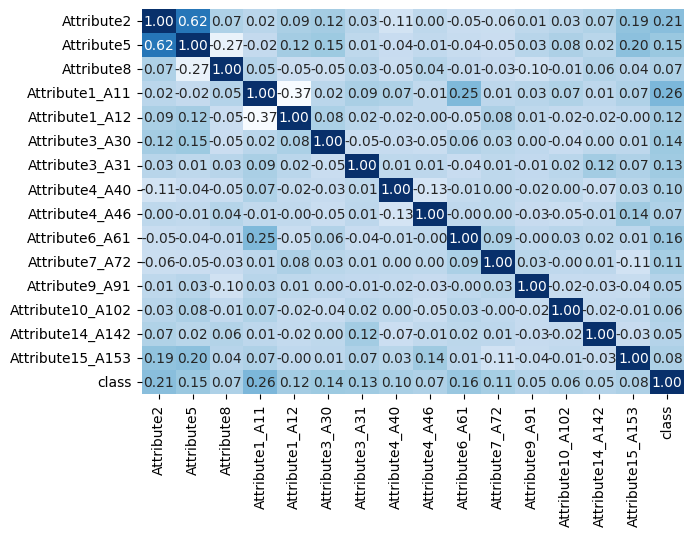

In [493]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.show()

Dapat dilihat, pada hasil akhir terdapat 15 feature yang digunakan untuk memprediksi class. Fitur ini tidak ada yang saling multicolinearity dan memiliki korelasi di atas 5% terhadap target class

Replace class to be binary

In [494]:
df['class'] = df['class'].replace({1: 0, 2: 1})

#### Data Splitting

In [495]:
X = df.drop(columns=['class']).values
y = df['class'].values

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Tensor Conversion

In [497]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [498]:
# Define batch size
batch_size = 256

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### 3. Model Building

Define your deep learning model's architecture.

In [499]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 300)
        self.bn1 = nn.BatchNorm1d(300)
        self.fc2 = nn.Linear(300, 200)
        self.bn2 = nn.BatchNorm1d(200)
        self.fc3 = nn.Linear(200, 150)
        self.bn3 = nn.BatchNorm1d(150)
        self.fc4 = nn.Linear(150, 100)
        self.bn4 = nn.BatchNorm1d(100)
        self.fc5 = nn.Linear(100, 50)
        self.bn5 = nn.BatchNorm1d(50)
        self.fc6 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = torch.relu(self.bn2(self.fc2(x)))
        x = torch.relu(self.bn3(self.fc3(x)))
        x = torch.relu(self.bn4(self.fc4(x)))
        x = torch.relu(self.bn5(self.fc5(x)))
        x = self.fc6(x)
        return x

### 4. Model Training

Train your model and evaluate its performance using validation data.

In [500]:
# Instantiate the model
model = MyModel()

# Define loss function
loss_fn = nn.BCEWithLogitsLoss()

# Define optimizer
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Define accuracy function for binary classification
def accuracy(outputs, labels):
    # Apply sigmoid activation to convert logits to probabilities
    probs = torch.sigmoid(outputs)
    # Convert probabilities to binary predictions (0 or 1)
    preds = (probs > 0.5).float()
    # Compute accuracy
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [501]:
# Train
dl_loss_value = 1
epochs = 5000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        labels = labels.unsqueeze(1)
        # Generate predictions
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        # Perform gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        dl_loss_value = loss.item()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, dl_loss_value))

Streaming output truncated to the last 5000 lines.
Epoch [3751/5000], Loss: 0.1696
Epoch [3751/5000], Loss: 0.2489
Epoch [3751/5000], Loss: 0.2100
Epoch [3751/5000], Loss: 0.3481
Epoch [3752/5000], Loss: 0.1798
Epoch [3752/5000], Loss: 0.2297
Epoch [3752/5000], Loss: 0.2326
Epoch [3752/5000], Loss: 0.3937
Epoch [3753/5000], Loss: 0.2197
Epoch [3753/5000], Loss: 0.1873
Epoch [3753/5000], Loss: 0.1822
Epoch [3753/5000], Loss: 0.2688
Epoch [3754/5000], Loss: 0.1878
Epoch [3754/5000], Loss: 0.1942
Epoch [3754/5000], Loss: 0.1760
Epoch [3754/5000], Loss: 0.3998
Epoch [3755/5000], Loss: 0.2729
Epoch [3755/5000], Loss: 0.1756
Epoch [3755/5000], Loss: 0.1414
Epoch [3755/5000], Loss: 0.3087
Epoch [3756/5000], Loss: 0.1500
Epoch [3756/5000], Loss: 0.2158
Epoch [3756/5000], Loss: 0.1793
Epoch [3756/5000], Loss: 0.4458
Epoch [3757/5000], Loss: 0.1814
Epoch [3757/5000], Loss: 0.2047
Epoch [3757/5000], Loss: 0.1436
Epoch [3757/5000], Loss: 0.6421
Epoch [3758/5000], Loss: 0.1758
Epoch [3758/5000], Lo

### 5. Model Evaluation
Evaluate your model's performance on the test data using the grading scheme defined above.

In [502]:
# Evaluate
dl_accuracy = 0

with torch.no_grad():
    accum_acc = 0
    for inputs, labels in test_loader:
        labels = labels.unsqueeze(1)
        outputs = model(inputs)
        acc = accuracy(outputs, labels)
        accum_acc += acc

    dl_accuracy = accum_acc / len(test_loader)
    print('Test accuracy: {:.4f}'.format(dl_accuracy))

Test accuracy: 0.7350


In [503]:
print(dl_accuracy)

tensor(0.7350)


In [504]:
print(dl_loss_value)

0.25542715191841125


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [505]:
# Do not change the code below
question_id = "01_dl_project_accuracy"
submit(student_id, name, assignment_id, str(dl_accuracy), question_id, drive_link)
question_id = "02_dl_project_loss_value"
submit(student_id, name, assignment_id, str(dl_loss_value), question_id, drive_link)

'Assignment successfully submitted'

## FIN